In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [62]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
df.shape

(891, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Features Description
* PassengerId = ID of unique Customers
* Survived = Passenger survived or not (Survived = 1, Not survived = 0)
* Pclass = Passenger Class
* Name = Name of the customer
* Sex = Male or Female
* Age = Age of the Customer
* SibSp = Number of sibling and spouse
* Parch = Number of parents or children
* Ticket = Unique ticket number
* Fare = Fare of the ticket
* Cabin = Cabin number of the passenger
* Embarked = Port where the passenger embarked from

In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Preprocessing

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Passenger ID, Name, Ticket, Cabin is not necessary for prediction and EDA. So we can drop them.

In [68]:
df_clean = df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [69]:
df_clean.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

There is 177 null value in Age and 2 null value in Embarked, we need to fill all null value by mean, median or mode.

In [70]:
df_clean['Age'].fillna(df_clean['Age'].mean(), inplace=True)
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)
df_clean.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Map columns by value

In [71]:
sex_map = {'male':1, 'female':2}
df_clean['Sex'] = df_clean['Sex'].map(sex_map).astype(int)
df_clean['Sex'].unique()

array([1, 2])

In [72]:
embarked_map = {'S':1, 'C':2, 'Q':3}
df_clean['Embarked'] = df_clean['Embarked'].map(embarked_map).astype(int)
df_clean['Embarked'].unique()

array([1, 2, 3])

In [73]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [74]:
df_clean.duplicated().sum()

111

In [75]:
df_clean.drop_duplicates(inplace=True)
df_clean.shape

(780, 8)

# Visualising the Data

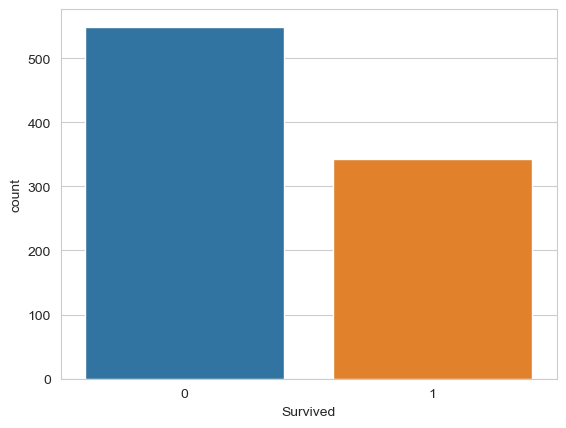

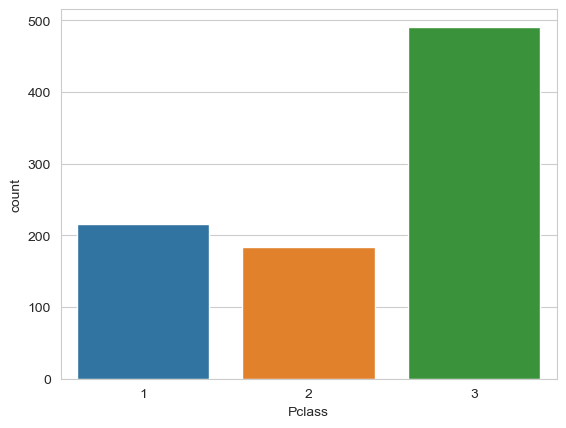

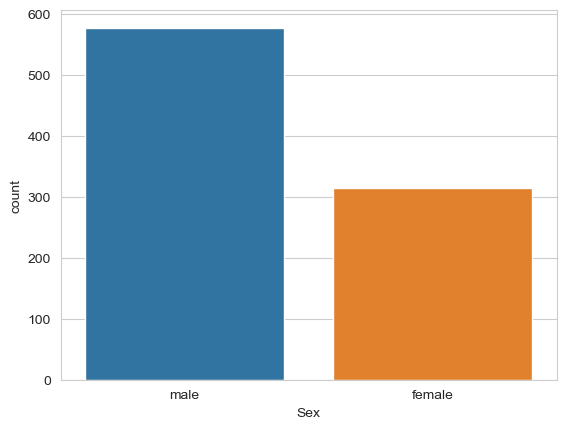

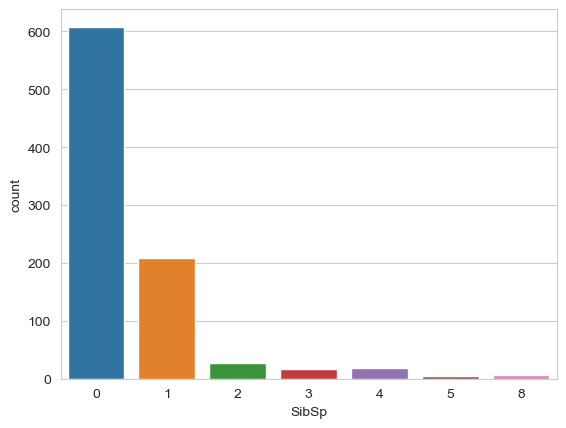

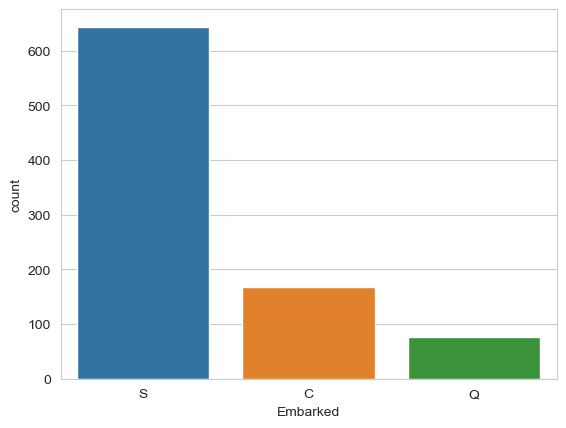

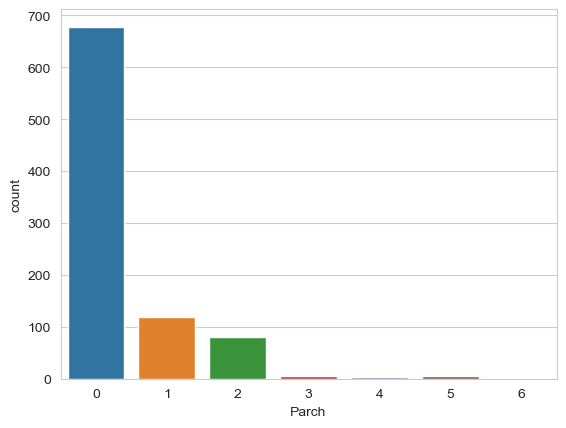

In [76]:
def count_plot(features):
    sns.countplot(x=features, data = df)
    plt.show()
    print('\n')
columns = ['Survived','Pclass','Sex','SibSp','Embarked', 'Parch']
for i in columns:
    count_plot(i)

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

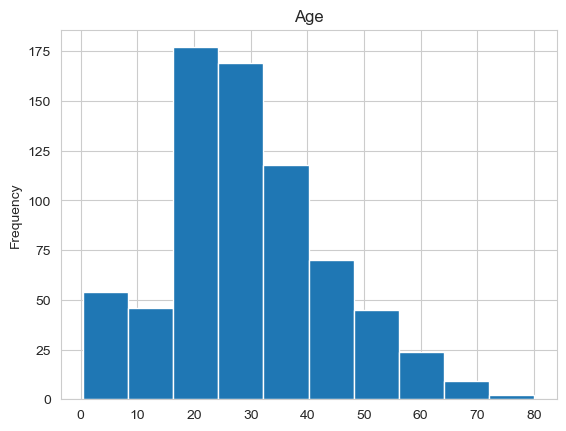

In [77]:
df["Age"].plot(kind='hist', title = "Age")

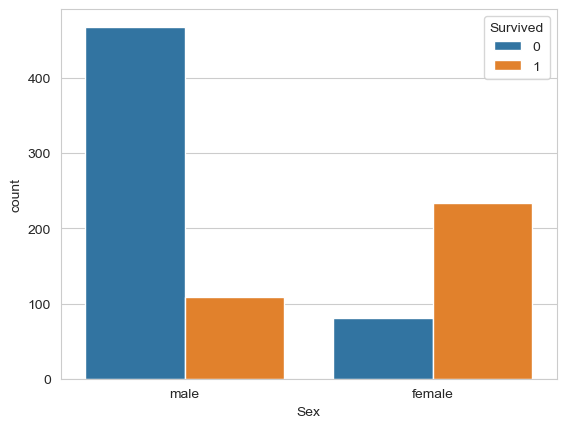

In [78]:
sns.countplot(x='Sex', data = df, hue='Survived')
plt.show()

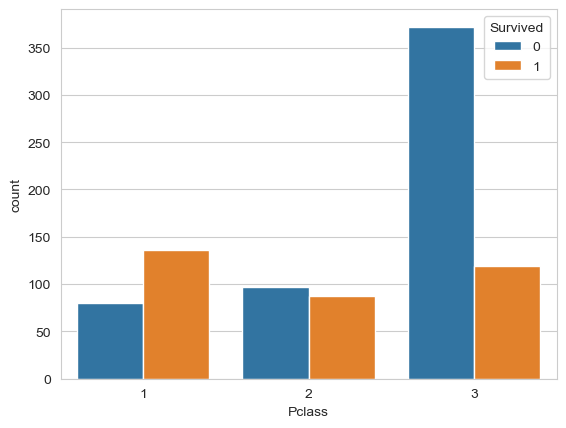

In [79]:
sns.countplot(x='Pclass', data = df, hue='Survived')
plt.show()

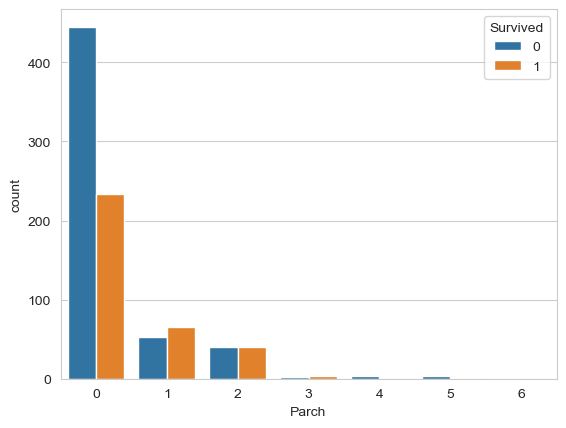

In [80]:
sns.countplot(x='Parch', data = df, hue='Survived')
plt.show()

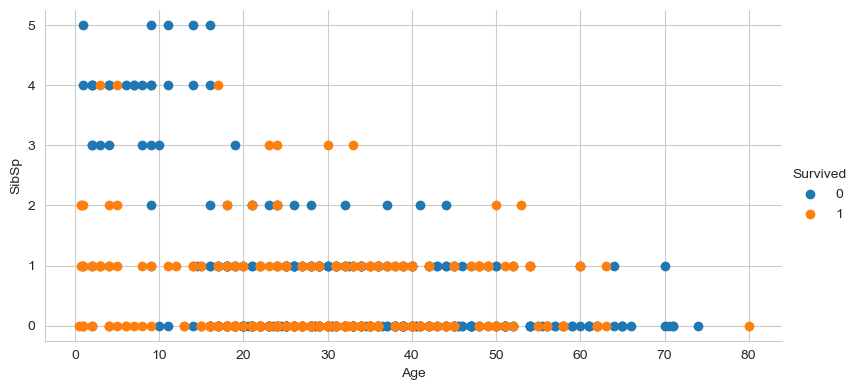

In [81]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='Survived', height=4, aspect=2) \
    .map(plt.scatter, "Age", "SibSp") \
    .add_legend();
plt.show();

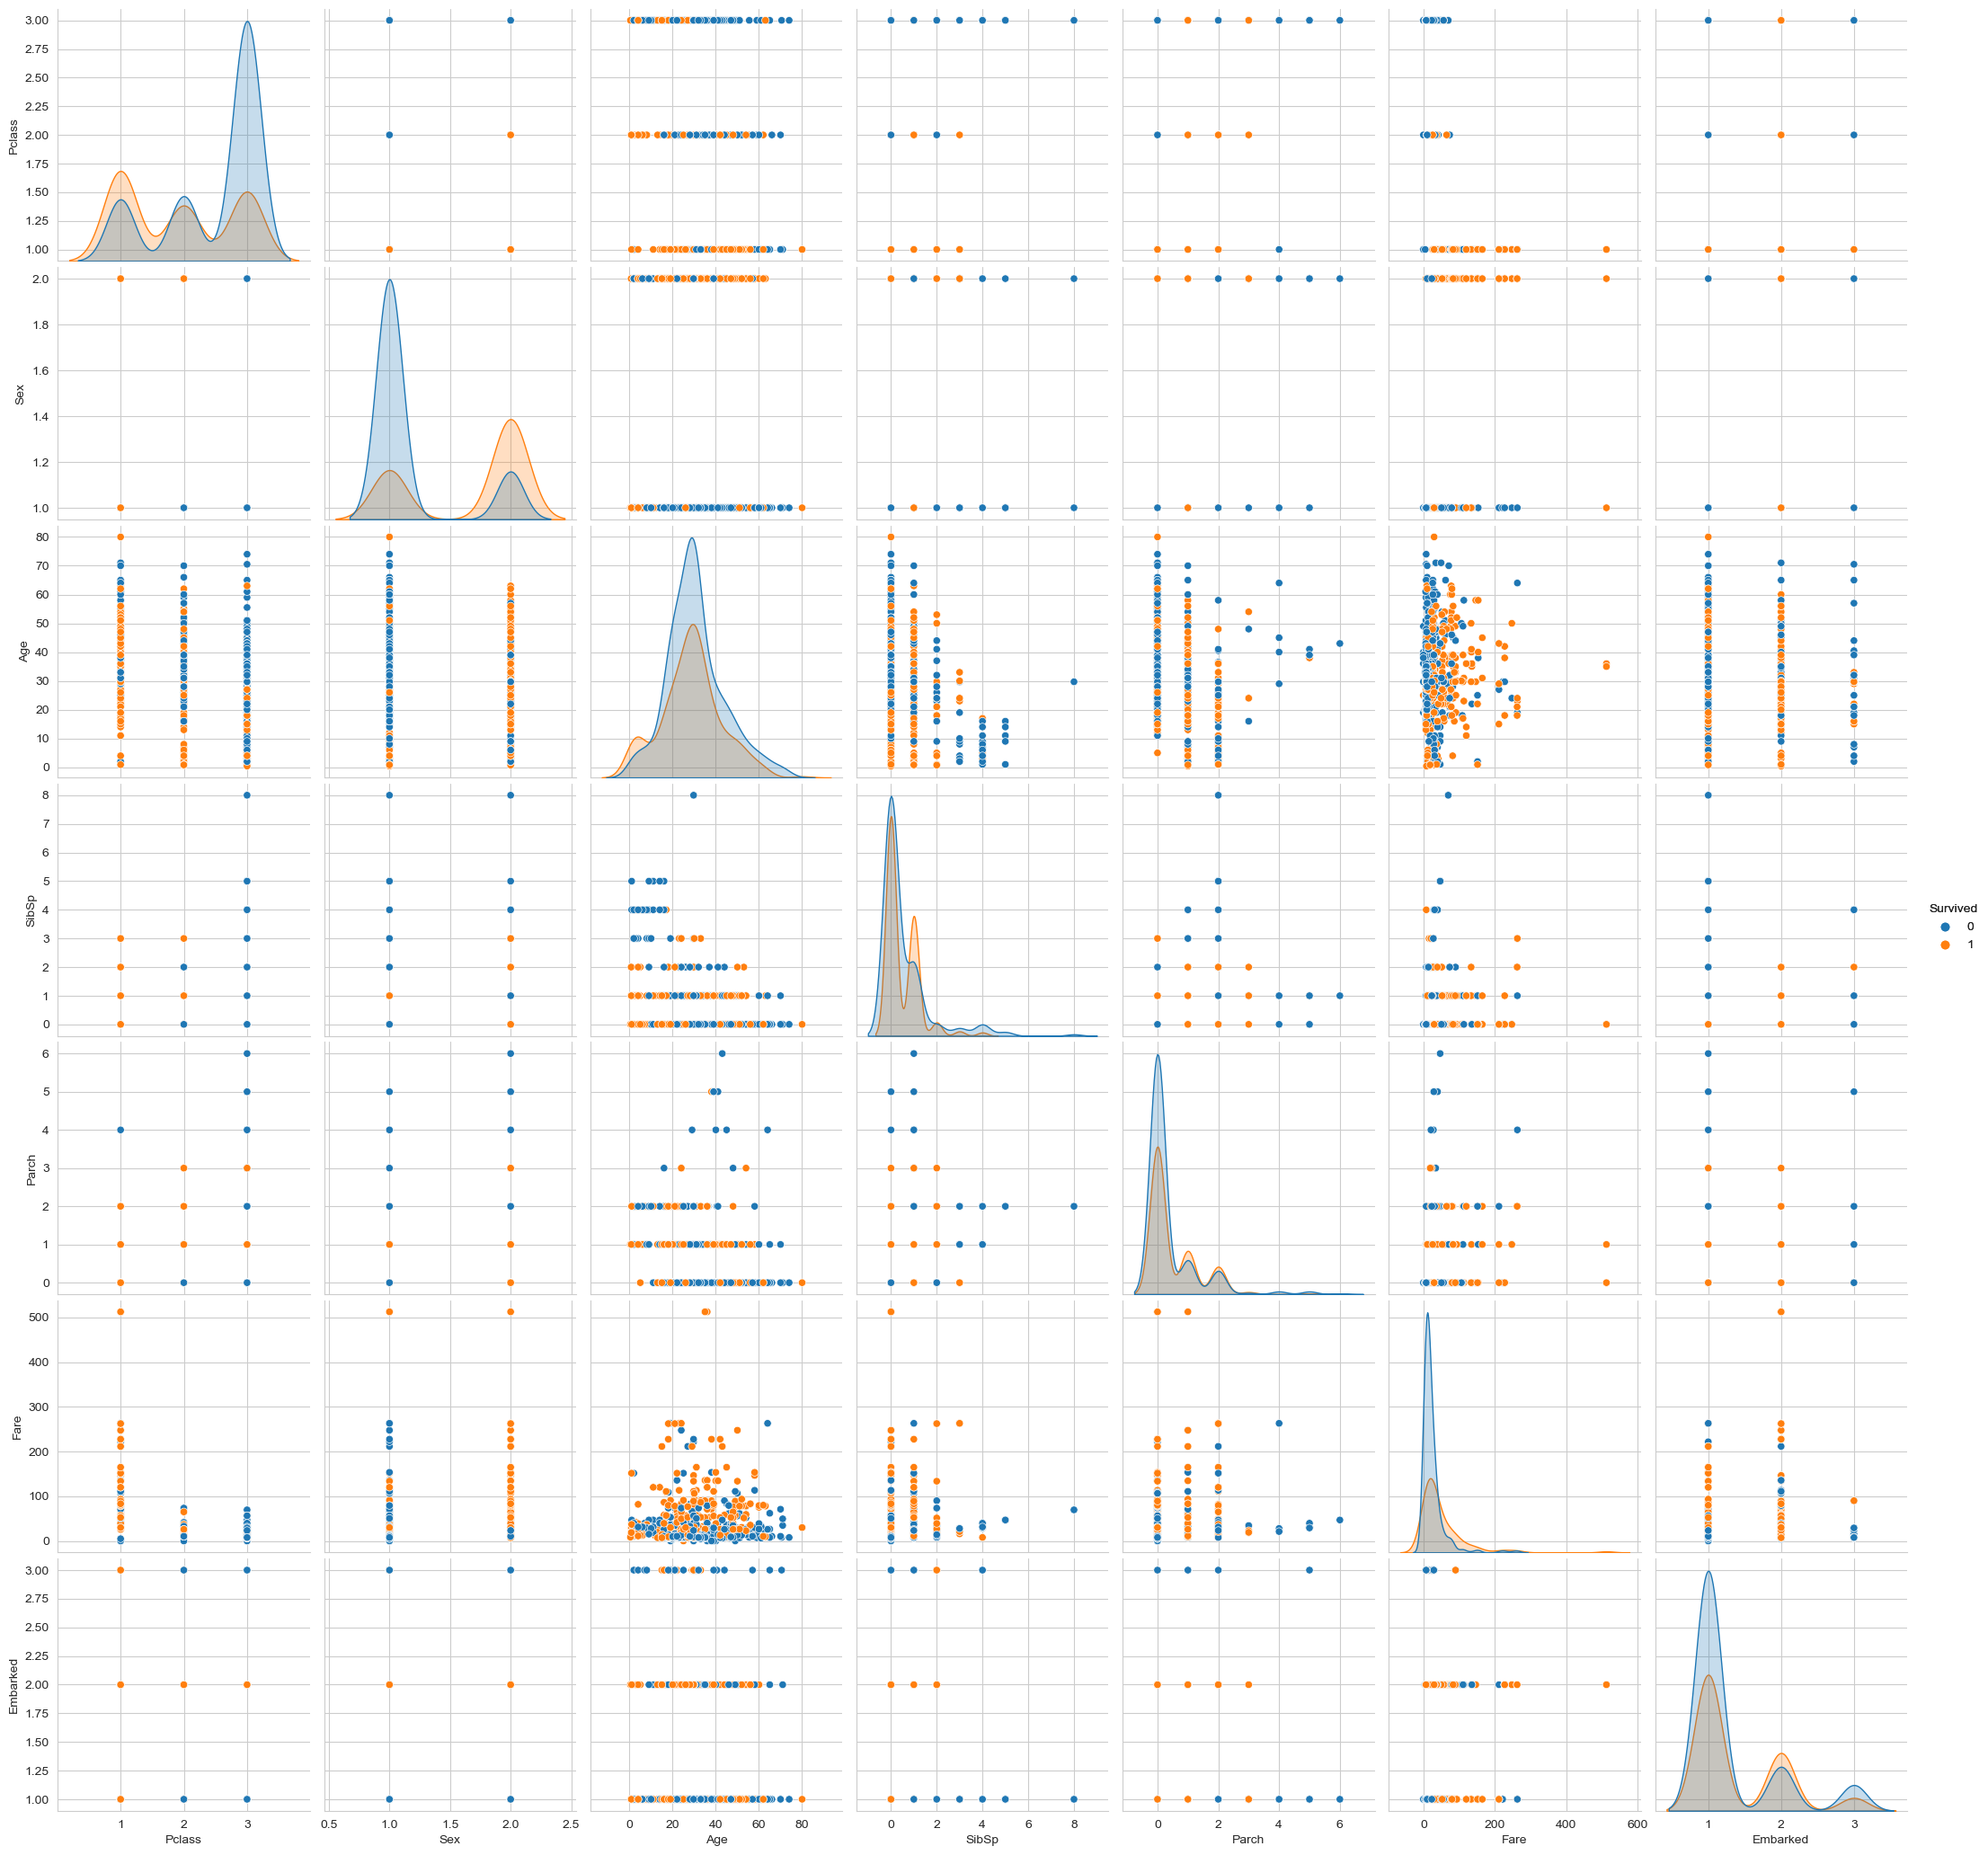

In [82]:
sns.set_style('whitegrid');
sns.pairplot(df_clean, hue='Survived', height=3) \
    .add_legend();
plt.show();

<Axes: >

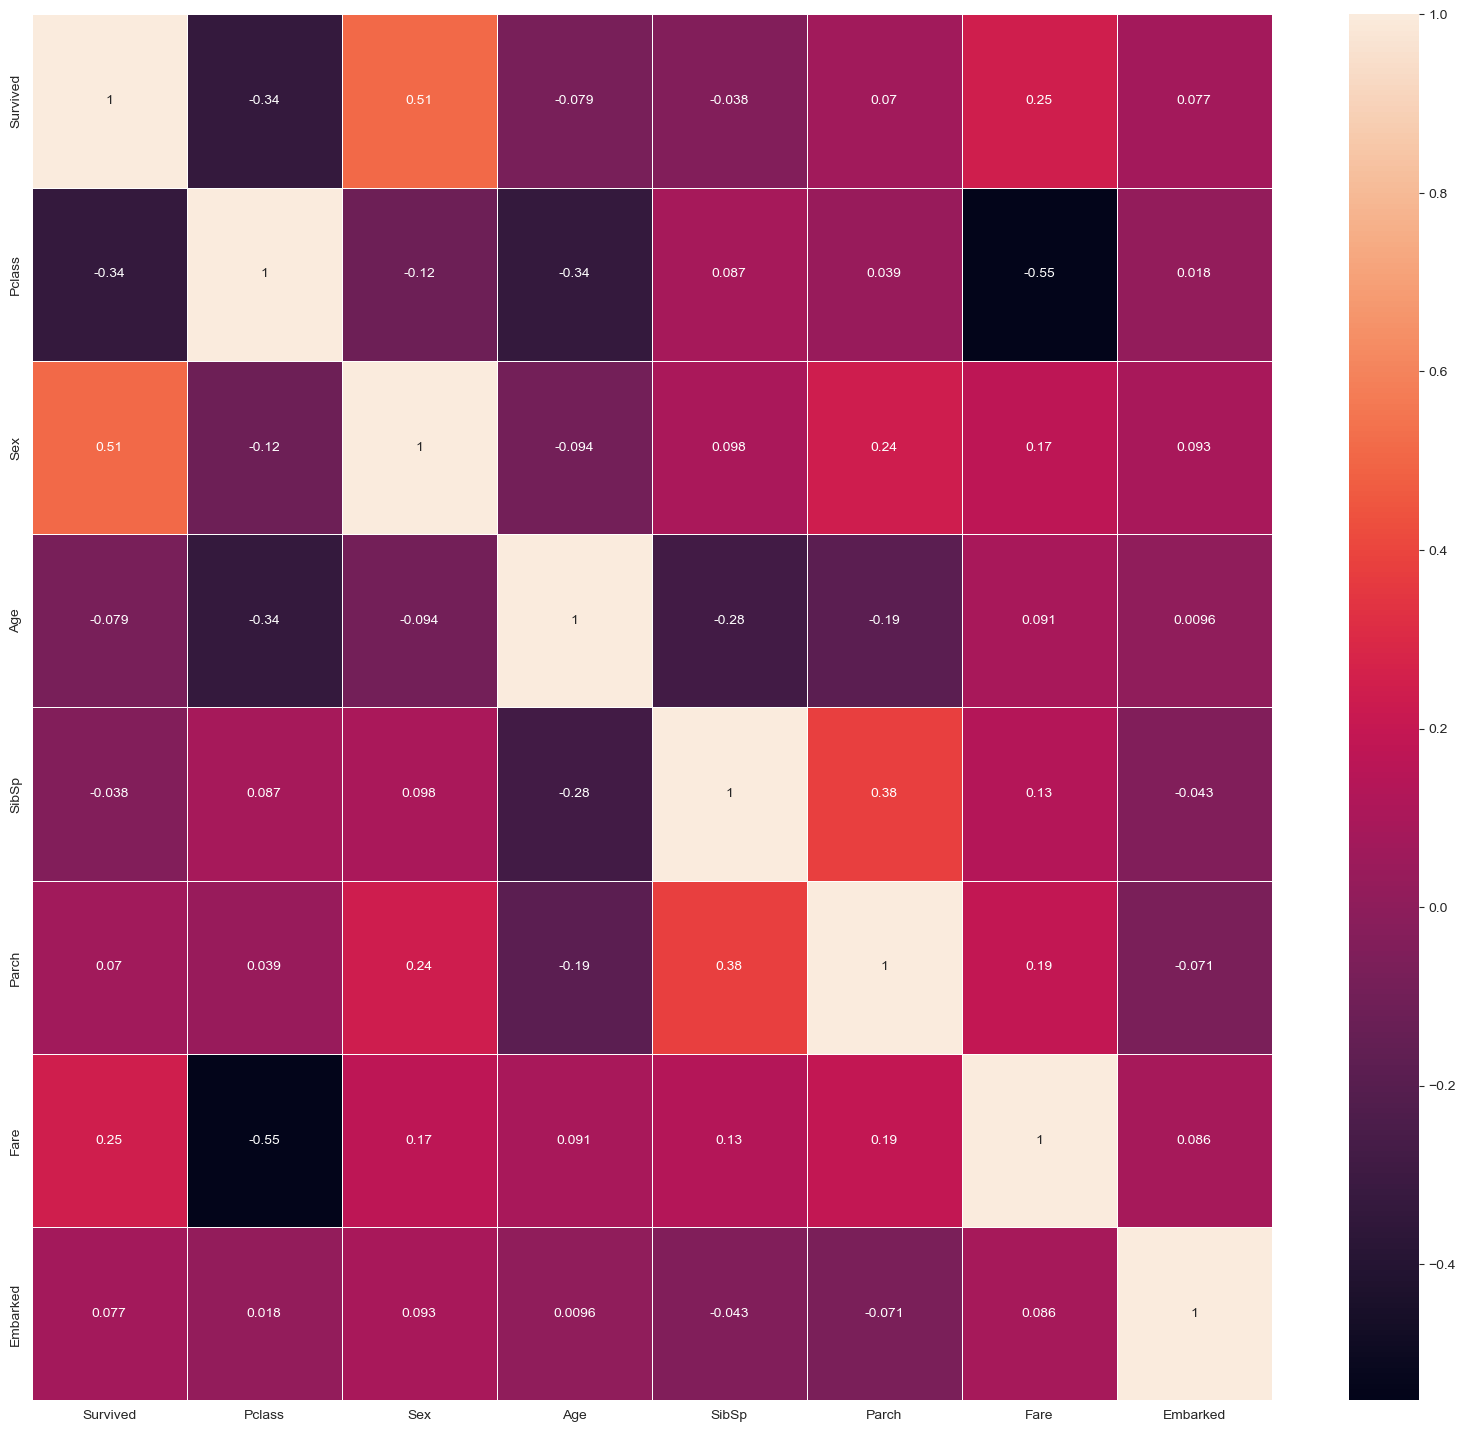

In [83]:
plt.figure(figsize=(20,18)) 
sns.heatmap(df_clean.corr(), annot=True, linewidths=.5)

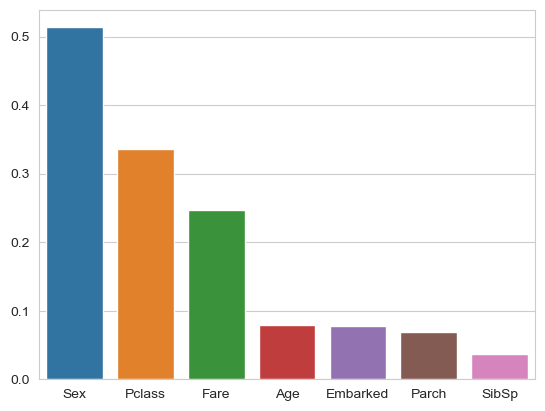

In [84]:
correlation_data = df_clean.corr()['Survived'].abs().sort_values(ascending=False)
sns.barplot(x=correlation_data.index[1:], y=correlation_data.values[1:])
plt.show()

Observations--
1. Actual dataset consist of 891 Rows and 12 Columns
2. There have some null value in the dataset, Age - 177; Cabin - 687 and Embarked - 2
3. There have 111 Duplicated value in the dataset
4. Approximately 550 (Male - 450, Female - 100)People are died in the incident where Approx 350 people are survived.
5. MOst of the passengers have no siblings, spouse, parents and children.
6. Maximum passengers age are between 20-30
7. Survival status has best correlation with sex.  

In [85]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,2,38.0,1,0,71.2833,2
2,1,3,2,26.0,0,0,7.9250,1
3,1,1,2,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [86]:
X = df_clean.drop('Survived', axis=1)
Y = df_clean['Survived']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=42)
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.transform(x_train)

In [89]:
x_train.shape

(624, 7)

In [90]:
x_test.shape

(156, 7)

In [91]:
X.shape

(780, 7)

In [92]:
y_pred = neigh.predict(x_test)
acc = accuracy_score(y_pred, y_test)
acc

C:\Users\Rashed\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.4166666666666667

In [93]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [94]:
neigh1 = KNeighborsClassifier(n_neighbors=5)
neigh1.fit(x_train, y_train)
y_pred = neigh1.predict(x_test)
acc1 = accuracy_score(y_pred, y_test)
acc1

0.7884615384615384

In [95]:
accuracies_test = []
accuracies_train = []

for i in range(1,31):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    
    y_pred_test = neigh.predict(x_test)
    acc_test = accuracy_score(y_pred_test, y_test)
    accuracies_test.append(acc_test)
    
    y_pred_train = neigh.predict(x_train)
    acc_train = accuracy_score(y_pred_train, y_train)
    
    
    print('For', i, 'Test acc is', acc_test)
    print('For', i, 'Train acc is', acc_train)
    print('*'*100)
    print('\n')
    
accuracy_index = accuracies_test.index(max(accuracies_test))+1
print('Max score is ', max(accuracies_test),'and i value is', accuracy_index)

For 1 Test acc is 0.7435897435897436
For 1 Train acc is 0.9823717948717948
****************************************************************************************************


For 2 Test acc is 0.782051282051282
For 2 Train acc is 0.8685897435897436
****************************************************************************************************


For 3 Test acc is 0.7884615384615384
For 3 Train acc is 0.8557692307692307
****************************************************************************************************


For 4 Test acc is 0.7692307692307693
For 4 Train acc is 0.8381410256410257
****************************************************************************************************


For 5 Test acc is 0.7884615384615384
For 5 Train acc is 0.8477564102564102
****************************************************************************************************


For 6 Test acc is 0.782051282051282
For 6 Train acc is 0.8349358974358975
*************************************

In [96]:
neigh2 = KNeighborsClassifier(n_neighbors=13)
neigh2.fit(x_train, y_train)
y_pred = neigh2.predict(x_test)
acc2 = accuracy_score(y_pred, y_test)
acc2

0.7948717948717948

In [97]:
parameters =  {'n_neighbors':list(range(1,30)), 'weights':['uniform','distance'], 'p':[1,2,3]}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

In [98]:
neigh = KNeighborsClassifier(n_neighbors=27, p=2, weights='uniform', leaf_size=1)
neigh.fit(x_train, y_train)
Y_Pred_test = neigh.predict(x_test)
Y_Pred_train = neigh.predict(x_train)

acc_test = accuracy_score(Y_Pred_test, y_test)
print('Test accuracy is ',acc_test)

acc_train = accuracy_score(Y_Pred_train, y_train)
print('Train accuracy is ',acc_train)

Test accuracy is  0.7628205128205128
Train accuracy is  0.8044871794871795


In [99]:
Y_Pred_test

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1], dtype=int64)

In [106]:
from sklearn.metrics import classification_report
target_names = ['2','1']
print(classification_report(y_test, Y_Pred_test, target_names=target_names))

              precision    recall  f1-score   support

           2       0.78      0.82      0.80        91
           1       0.73      0.68      0.70        65

    accuracy                           0.76       156
   macro avg       0.76      0.75      0.75       156
weighted avg       0.76      0.76      0.76       156



In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_Pred_test)


array([[75, 16],
       [21, 44]], dtype=int64)